In [164]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
df=pd.read_csv('data.csv')

In [166]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [168]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Firstly lets handle the numerical missing data

In [169]:
df['Item_Weight'].isnull().sum()

np.int64(1463)

In [170]:
df['Item_Weight'].value_counts()

Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
8.920      2
6.520      1
9.420      1
7.685      1
5.400      1
Name: count, Length: 415, dtype: int64

<Axes: xlabel='Item_Weight', ylabel='Density'>

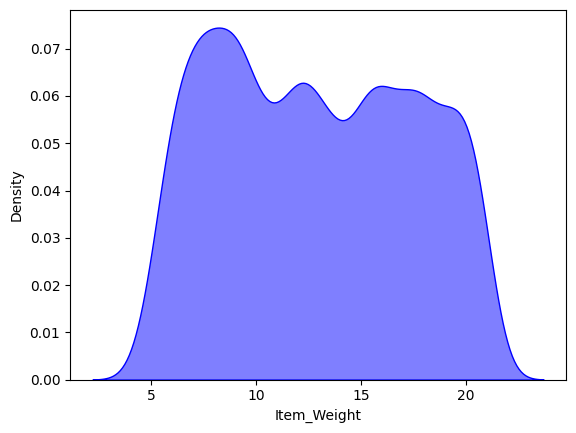

In [171]:
sns.kdeplot(df['Item_Weight'], fill=True, color='blue', alpha=0.5)

In [172]:
df['Item_Weight'].skew()

np.float64(0.0824262091221237)

In [173]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['Item_Weight'] = imputer.fit_transform(df[['Item_Weight']])
df['Item_Weight'].isnull().sum()

np.int64(0)

In [174]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [176]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [177]:
df['Outlet_Size']=df['Outlet_Size'].map({'Small': 0, 'Medium': 1, 'High': 2})

In [178]:
df['Outlet_Size'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Outlet_Size
Non-Null Count  Dtype  
--------------  -----  
6113 non-null   float64
dtypes: float64(1)
memory usage: 66.7 KB


In [179]:
df['Outlet_Size'].corr(df['Item_Outlet_Sales'])

np.float64(0.1290756225269388)

In [180]:
df=df.drop(['Outlet_Size'], axis=1)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [182]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [183]:
df['Item_Fat_Content']=df['Item_Fat_Content'].map({'Low Fat': 0, 'Regular': 1, 'LF': 0, 'reg': 1, 'low_fat':0})

In [184]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
0.0    5405
1.0    3006
Name: count, dtype: int64

In [185]:
df['Item_Fat_Content'].fillna(0, inplace=True)

C:\Users\DAKSH\AppData\Local\Temp\ipykernel_11772\3844976215.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Fat_Content'].fillna(0, inplace=True)


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   float64
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 732.6+ KB


In [187]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

<Axes: ylabel='count'>

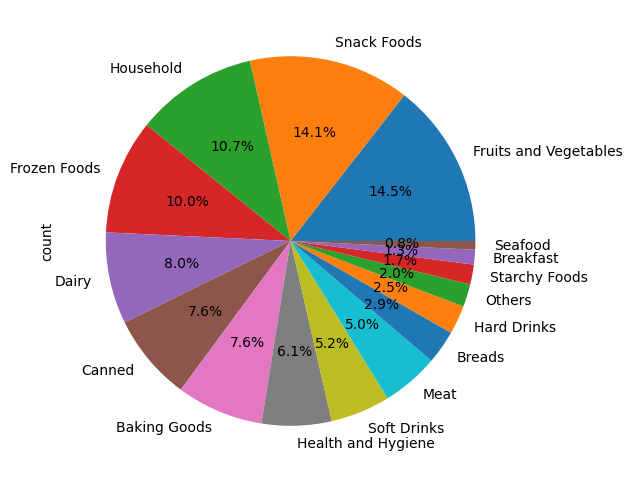

In [188]:
df['Item_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 6))

In [189]:
df['Item_Type']=df['Item_Type'].apply(lambda x: x if df['Item_Type'].value_counts()[x] >= 252 else 'Others')

In [190]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Others                    956
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Name: count, dtype: int64

<Axes: ylabel='count'>

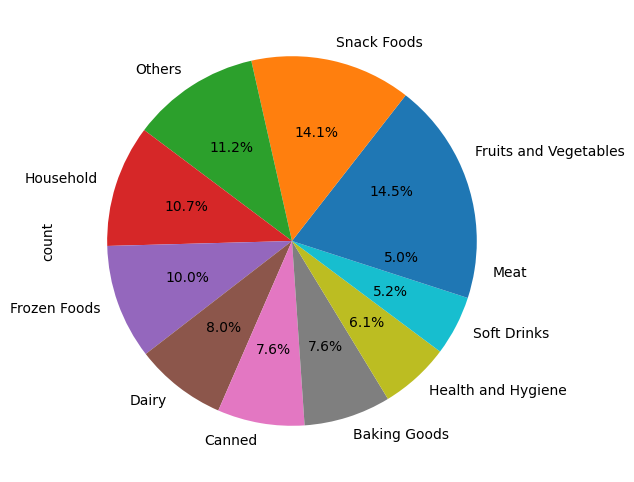

In [191]:
df['Item_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 6))

In [192]:
df=pd.get_dummies(df, columns=['Item_Type'], drop_first=True)

In [193]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Snack Foods,Item_Type_Soft Drinks
0,FDA15,9.300,0.0,0.016047,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,False,True,False,False,False,False,False,False,False,False
1,DRC01,5.920,1.0,0.019278,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,False,False,False,False,False,False,False,False,False,True
2,FDN15,17.500,0.0,0.016760,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,False,False,False,False,False,False,True,False,False,False
3,FDX07,19.200,1.0,0.000000,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,False,False,False,True,False,False,False,False,False,False
4,NCD19,8.930,0.0,0.000000,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.0,0.056783,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834,False,False,False,False,False,False,False,False,True,False
8519,FDS36,8.380,1.0,0.046982,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850,False,False,False,False,False,False,False,False,False,False
8520,NCJ29,10.600,0.0,0.035186,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136,False,False,False,False,True,False,False,False,False,False
8521,FDN46,7.210,1.0,0.145221,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976,False,False,False,False,False,False,False,False,True,False


In [194]:
one_hot_cols = [col for col in df.columns if col.startswith('Item_Type_')]
df[one_hot_cols] = df[one_hot_cols].astype(int)

In [195]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Snack Foods,Item_Type_Soft Drinks
0,FDA15,9.300,0.0,0.016047,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,0,1,0,0,0,0,0,0,0,0
1,DRC01,5.920,1.0,0.019278,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,0,0,0,0,0,0,0,0,0,1
2,FDN15,17.500,0.0,0.016760,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,0,0,0,0,0,0,1,0,0,0
3,FDX07,19.200,1.0,0.000000,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,0,0,0,1,0,0,0,0,0,0
4,NCD19,8.930,0.0,0.000000,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.0,0.056783,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834,0,0,0,0,0,0,0,0,1,0
8519,FDS36,8.380,1.0,0.046982,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850,0,0,0,0,0,0,0,0,0,0
8520,NCJ29,10.600,0.0,0.035186,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136,0,0,0,0,1,0,0,0,0,0
8521,FDN46,7.210,1.0,0.145221,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976,0,0,0,0,0,0,0,0,1,0


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   object 
 1   Item_Weight                      8523 non-null   float64
 2   Item_Fat_Content                 8523 non-null   float64
 3   Item_Visibility                  8523 non-null   float64
 4   Item_MRP                         8523 non-null   float64
 5   Outlet_Identifier                8523 non-null   object 
 6   Outlet_Establishment_Year        8523 non-null   int64  
 7   Outlet_Location_Type             8523 non-null   object 
 8   Outlet_Type                      8523 non-null   object 
 9   Item_Outlet_Sales                8523 non-null   float64
 10  Item_Type_Canned                 8523 non-null   int64  
 11  Item_Type_Dairy                  8523 non-null   int64  
 12  Item_Type_Frozen Foo

In [197]:
df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [198]:
df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

<Axes: ylabel='count'>

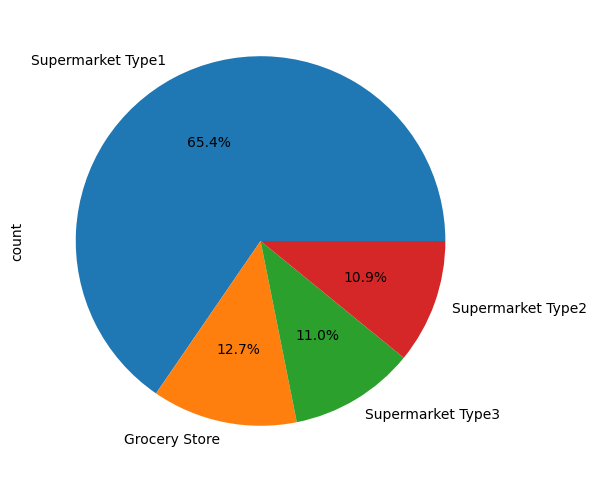

In [199]:
df['Outlet_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 6))

In [200]:
df['Outlet_Location_Type']=df['Outlet_Location_Type'].map({'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2})
df['Outlet_Type']=df['Outlet_Type'].map({'Grocery Store': 0, 'Supermarket Type1': 2, 'Supermarket Type2': 1, 'Supermarket Type3': 1})

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   object 
 1   Item_Weight                      8523 non-null   float64
 2   Item_Fat_Content                 8523 non-null   float64
 3   Item_Visibility                  8523 non-null   float64
 4   Item_MRP                         8523 non-null   float64
 5   Outlet_Identifier                8523 non-null   object 
 6   Outlet_Establishment_Year        8523 non-null   int64  
 7   Outlet_Location_Type             8523 non-null   int64  
 8   Outlet_Type                      8523 non-null   int64  
 9   Item_Outlet_Sales                8523 non-null   float64
 10  Item_Type_Canned                 8523 non-null   int64  
 11  Item_Type_Dairy                  8523 non-null   int64  
 12  Item_Type_Frozen Foo

In [203]:
x= df.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'], axis=1)
y= df['Item_Outlet_Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [204]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [205]:
y_pred=model.predict(x_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 791.2957713107044
Mean Squared Error: 1305218.5916457172
R-squared: 0.5197818373068293


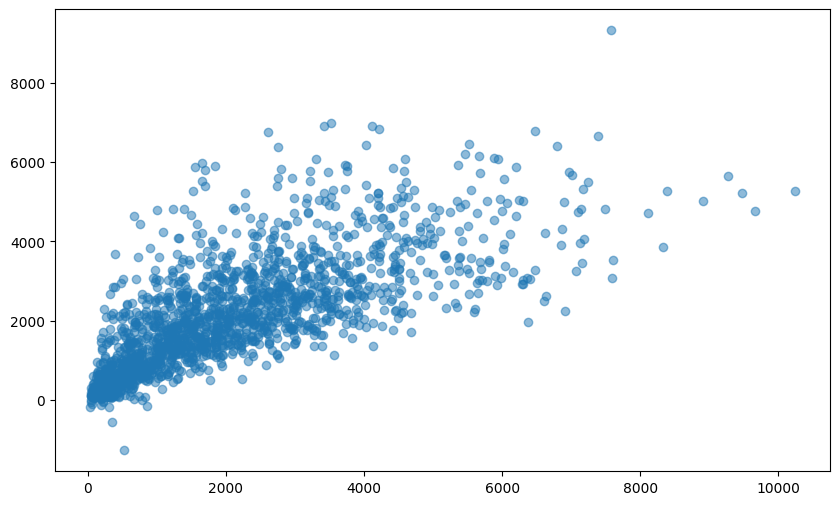

In [206]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

In [207]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_lr = model.predict(x_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression Mean Absolute Error: {mae_lr}')
print(f'Linear Regression Mean Squared Error: {mse_lr}')
print(f'Linear Regression R-squared: {r2_lr}')

Linear Regression Mean Absolute Error: 918.9017036990222
Linear Regression Mean Squared Error: 1526550.0982122314
Linear Regression R-squared: 0.4383491867839251


In [208]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model=XGBRegressor()
model.fit(x_train_scaled, y_train)
y_pred_scaled = model.predict(x_test_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)
print(f'Scaled XGBoost Mean Absolute Error: {mae_scaled}')
print(f'Scaled XGBoost Mean Squared Error: {mse_scaled}')
print(f'Scaled XGBoost R-squared: {r2_scaled}')

Scaled XGBoost Mean Absolute Error: 791.2957713107044
Scaled XGBoost Mean Squared Error: 1305218.5916457172
Scaled XGBoost R-squared: 0.5197818373068293
